In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### 1. Data Processing

In [57]:
# Import full data set using Pandas and verify the shape
df = pd.read_excel('default of credit card clients.xls', usecols=lambda x: 'Unnamed' not in x,)
df.shape

(30000, 24)

In [58]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [59]:
# Remove NaN / NA values from dataset
df = df.dropna()
df.shape

(30000, 24)

In [60]:
# Create X & y objects 
cols = list(df.columns.values) 
cols.pop(cols.index('default payment next month')) 
X = df[cols] 
y = df['default payment next month']

print(X.shape, y.shape)

(30000, 23) (30000,)


In [61]:
# Generate X_train, X_test, y_train & y_test. Use 70% for train & 30% for test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Random Forest Classifier - Base Model

In [62]:
# Fit the RandomForestClassifier model on the training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
# Use the fitted model to predict on test data. 
# Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
y_pred_proba_answer = y_pred_proba[:,1]

print(y_pred[:10])
print(y_pred_proba[:10])
print(y_pred_proba_answer[:10])

[0 0 0 0 0 0 0 0 0 0]
[[0.72 0.28]
 [0.89 0.11]
 [0.67 0.33]
 [0.92 0.08]
 [0.77 0.23]
 [0.88 0.12]
 [0.54 0.46]
 [0.97 0.03]
 [0.96 0.04]
 [0.7  0.3 ]]
[0.28 0.11 0.33 0.08 0.23 0.12 0.46 0.03 0.04 0.3 ]


In [64]:
# Calculate the confusion matrix and classification report 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

[[6611  429]
 [1251  709]]


In [83]:
# Calculate the roc_auc_score for this model
print(roc_auc_score(y_test, y_pred_proba_answer))

0.7549265494550094


In [66]:
# Calculate predictions for the training data & build the classification report & roc_auc_score. 
y_pred_train = rf.predict(X_train)
y_pred_train_proba = rf.predict_proba(X_train)
y_pred_train_proba_answer = y_pred_train_proba[:,1]

print(y_pred_train[:10])
print(y_pred_train_proba[:10])
print(y_pred_train_proba_answer[:10])

[1 0 0 0 0 0 0 0 0 0]
[[0.3  0.7 ]
 [0.94 0.06]
 [0.81 0.19]
 [0.82 0.18]
 [0.99 0.01]
 [0.97 0.03]
 [0.98 0.02]
 [1.   0.  ]
 [0.91 0.09]
 [0.88 0.12]]
[0.7  0.06 0.19 0.18 0.01 0.03 0.02 0.   0.09 0.12]


In [67]:
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
print(roc_auc_score(y_train, y_pred_train))

# Are there signs of overfitting? Why or why not?
# There is a sign of overfitting since the training accuracy is way higher than the testing one. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00      4676

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

[[16320     4]
 [    7  4669]]
0.9991289780155445


### 3. Random Forest Classifier - Grid Search

In [35]:
# Create a simple Random Forest only using default parameters.
rf = RandomForestClassifier(random_state = 42)

In [36]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [38]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [44]:
# Number of trees in random forest
n_estimators = [50, 100, 500]
# Number of features to consider at every split
max_features = [2, 4, 'sqrt']
# Maximum number of levels in tree
max_depth = [6, 8, 10, 12]
# Minimum number of samples required to split a node
min_samples_split = [3,4,5,6,7,8]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
pprint(param_grid)

{'max_depth': [6, 8, 10, 12],
 'max_features': [2, 4, 'sqrt'],
 'min_samples_split': [3, 4, 5, 6, 7, 8],
 'n_estimators': [50, 100, 500]}


In [47]:
# Use the random grid to search for best hyperparameters

# create Random Forest model 
rf_obj = RandomForestClassifier()

# Create gridsearch object with various combinations of parameters
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',
                       refit = True, n_jobs=-1, verbose = 5)

rf_Grid.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'max_features': [2, 4, 'sqrt'],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 500]},
             scoring='roc_auc', verbose=5)

In [48]:
# Identify the best performing model:
best_param = rf_Grid.best_params_

best_grid = rf_Grid.best_estimator_

print(best_param)
print(best_grid)

{'max_depth': 10, 'max_features': 4, 'min_samples_split': 7, 'n_estimators': 500}
RandomForestClassifier(max_depth=10, max_features=4, min_samples_split=7,
                       n_estimators=500)


In [49]:
# Use the best estimator model to predict on test data. 
# Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

grid_y_pred = rf_Grid.predict(X_test)
grid_y_pred_proba = rf_Grid.predict_proba(X_test)
grid_y_pred_proba_answer = grid_y_pred_proba[:,1]

print(grid_y_pred[:10])
print(grid_y_pred_proba[:10])
print(grid_y_pred_proba_answer[:10])

[0 0 0 0 0 0 0 0 0 0]
[[0.83853749 0.16146251]
 [0.90934359 0.09065641]
 [0.87752101 0.12247899]
 [0.90371251 0.09628749]
 [0.80554047 0.19445953]
 [0.84623223 0.15376777]
 [0.62565533 0.37434467]
 [0.69393561 0.30606439]
 [0.93046707 0.06953293]
 [0.83968732 0.16031268]]
[0.16146251 0.09065641 0.12247899 0.09628749 0.19445953 0.15376777
 0.37434467 0.30606439 0.06953293 0.16031268]


In [50]:
# Calculate the confusion matrix and classification report 
print(classification_report(y_test, grid_y_pred))
print(confusion_matrix(y_test, grid_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6695  345]
 [1264  696]]


In [84]:
# Calculate the roc_auc_score for this model.
print(roc_auc_score(y_test, grid_y_pred_proba_answer))

0.7749648147611318


In [68]:
# Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. 
grid_y_pred_train = rf_Grid.predict(X_train)
grid_y_pred_train_proba = rf_Grid.predict_proba(X_train)
grid_y_pred_train_proba_answer = grid_y_pred_train_proba[:,1]

print(grid_y_pred_train[:10])
print(grid_y_pred_train_proba[:10])
print(grid_y_pred_train_proba_answer[:10])

[0 0 1 0 0 0 0 0 0 0]
[[0.69445038 0.30554962]
 [0.89218566 0.10781434]
 [0.44217063 0.55782937]
 [0.57807444 0.42192556]
 [0.92170609 0.07829391]
 [0.89437287 0.10562713]
 [0.92230391 0.07769609]
 [0.91134952 0.08865048]
 [0.85133978 0.14866022]
 [0.68946628 0.31053372]]
[0.30554962 0.10781434 0.55782937 0.42192556 0.07829391 0.10562713
 0.07769609 0.08865048 0.14866022 0.31053372]


In [69]:
print(classification_report(y_train, grid_y_pred_train))
print(confusion_matrix(y_train, grid_y_pred_train))
print(roc_auc_score(y_train, grid_y_pred_train))
# Are there signs of overfitting? Why or why not?
# It is not overfitting this time because the accuracy score of the train data is similar or even smaller than the testing one.
# That means the new model finds a balance between learning the parameters.

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     16324
           1       0.83      0.45      0.58      4676

    accuracy                           0.86     21000
   macro avg       0.84      0.71      0.75     21000
weighted avg       0.85      0.86      0.84     21000

[[15880   444]
 [ 2578  2098]]
0.710737432266073


### 4. Create a feature importance plot for your best performing model

In [70]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

Feature: 0, Score: 0.03791
Feature: 1, Score: 0.00361
Feature: 2, Score: 0.00905
Feature: 3, Score: 0.00554
Feature: 4, Score: 0.02727
Feature: 5, Score: 0.24391
Feature: 6, Score: 0.11031
Feature: 7, Score: 0.06589
Feature: 8, Score: 0.05322
Feature: 9, Score: 0.04059
Feature: 10, Score: 0.03910
Feature: 11, Score: 0.03475
Feature: 12, Score: 0.03336
Feature: 13, Score: 0.02908
Feature: 14, Score: 0.02763
Feature: 15, Score: 0.02748
Feature: 16, Score: 0.02783
Feature: 17, Score: 0.04375
Feature: 18, Score: 0.03194
Feature: 19, Score: 0.03047
Feature: 20, Score: 0.02679
Feature: 21, Score: 0.02500
Feature: 22, Score: 0.02552


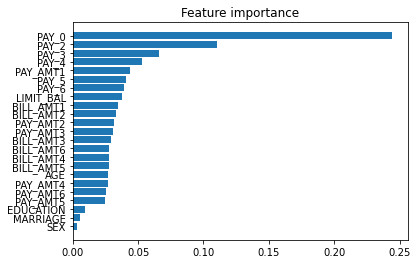

In [80]:
# get importance
importance = rf_Grid.best_estimator_.feature_importances_

features = X_train.columns
indices = np.argsort(importance)

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.title('Feature importance')

plt.barh(range(len(importance)), importance[indices])
plt.yticks(range(len(importance)), [features[i] for i in indices])
         
plt.show()

As the graph shown above, the top 5 features are: pay_0, pay_2, pay_3, pay_4, and pay_amt1

### 5. Conceptual Questions

1. What are the best parameters from the Grid Search in Question # 3? Does the Model from #3 outperform Model #2?

The best parameters are: <br>
cv=5, estimator=RandomForestClassifier(), n_jobs=-1, <br>
param_grid={'max_depth': [6, 8, 10, 12], <br>
                         'max_features': [2, 4, 'sqrt'], <br>
                         'min_samples_split': [3, 4, 5, 6, 7, 8], <br>
                         'n_estimators': [50, 100, 500]}, <br>
                         scoring='roc_auc', verbose=5)} <br>
                         
---- Yes, it does outperform because the accuracy score for the test data using the model from Q3 is higher than that from Q2. And the model from Q3 deals with the overfitting problem. 

2. Overfitting is always a concern in ML problems. Does Model #3 overfit data more or less than Model #2? Explain why you think this is the case. 

---- The model #3 overfit data less than Model #2. Since the accuracy score from test has smaller gap to the training score compared to that of model 2, we can say that the model 3 finds a balance between learning the parameters.

3. The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?). 

---- Gini Index calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. It will be smaller if the node becomes more pure. In other words, the better classification is, the smaller gini gets. 

4. Describe how Random Forest is different from bagging & why this difference can yield improved results.

---- Due to the random feature selection, the trees from random forest model are more independent of each other compared to regular bagging, which often results in better predictive performance (due to better variance-bias trade-offs). Moreover, it’s faster than bagging, because each tree learns only from a subset of features.

5. Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.

---- The max_depth parameter specifies the maximum depth of each tree. The deeper the tree, the more splits it has and it captures more information about the data. However, if the tree classify in too much details, it may cause overfitting problems. In other words, the more deeper it gets, the more possible it will cause variance problem. However, if it is not classified that clear, the model will go underfit. Thus, we should keep a nice balance. 

6. In this homework we used k-fold cross-validation while determining the optimal hyperparameters for our Random Forest model. 1) Describe how k-fold cross-validation works. 2) What benefit do we gain by using k-fold cross-validation when tuning our Random Forest model versus only using the train-test split approach?

---- K-fold cross-validation is a resampling procedure than takes a single parameter called k (the number of groups that a given data sample is to be split into) and split the dataset. For each unique group: we should: 1)Take the group as a hold out or test data set; 2)Take the remaining groups as a training data set; 3)Fit a model on the training set and evaluate it on the test set; 4)Retain the evaluation score and discard the model; 5)Summarize the skill of the model using the sample of model evaluation scores

---- The benefit of using k-fold cross valiadation is to optimize the model parameters. By using the k-fold, training happens k times, each time leaving out a different part of the training set. The error of these k-models is averaged. 